In [2]:
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import numpy as np 
import scipy as scp

In [3]:
files = glob.glob('data/*_d.txt')
D = {}
for file in files:
    key = 'Bi_' + file.split('/')[1].split('05')[1].split('_')[0].split('Bi')[0].split('X')[-1]
    D[key] = np.array(pd.read_csv(file,header=1,sep = '\t').astype(np.float64))
file =  open(glob.glob('data/inf*')[0])
lines = file.readlines()[2:]
inflections = []
for line in lines:
    line = line.split('\n')[0].split('\t')
    _ = []
    for l in line:
        _.append(l if l != '' else '0')
    if _[1:] != ['0','0','0']:
        inflections.append(_)
inflections = np.array(inflections).astype(np.float64)
D.keys()

dict_keys(['Bi_90', 'Bi_65', 'Bi_00', 'Bi_40', 'Bi_55', 'Bi_50', 'Bi_15', 'Bi_25'])

## Question 1

In [4]:
def q1plotter(data,kwargs={'linestyle':'-'}):
    t,s = data[:,0],data[:,2]
    plt.plot(s,t,**kwargs)
    plt.xlabel('Time   [s]')
    plt.ylabel('Temperature   [$^o$C]')
    plt.grid()

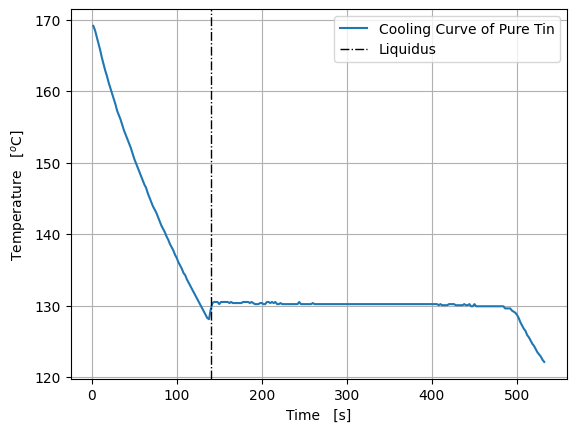

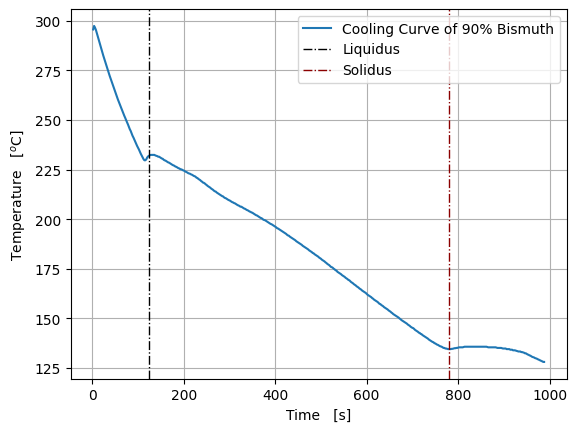

In [5]:
q1plotter(D['Bi_00'],{'label':'Cooling Curve of Pure Tin'})
plt.axvline(140,color = 'k',linestyle = '-.',linewidth = 1,label = 'Liquidus')
plt.legend()
plt.savefig('plots/q1_00.png',dpi=600)
plt.show()

q1plotter(D['Bi_90'],{'label':'Cooling Curve of 90% Bismuth'})
plt.axvline(125,color = 'k',linestyle = '-.',linewidth = 1,label = 'Liquidus')
plt.axvline(780,color = 'darkred',linestyle = '-.',linewidth = 1,label = 'Solidus')
plt.legend()
plt.savefig('plots/q1_90.png',dpi=600)
plt.show()

## Question 2

In [6]:
def q2plotter(data,img):
    image = plt.imread(img)
    fig,ax = plt.subplot_mosaic([['data','micro']],figsize=(9,3.5))
    ax['micro'].imshow(image)
    ax['micro'].axis('off')
    ax['micro'].set_aspect(1.1)
    
    ax['data'].plot(data[:,2],data[:,0])
    ax['data'].grid()
    ax['data'].set_xlabel('Time   [s]')
    ax['data'].set_ylabel('Temperature   [$^o$C]')

['00.jpg', '25.jpg', '50.jpg', '55.jpg']

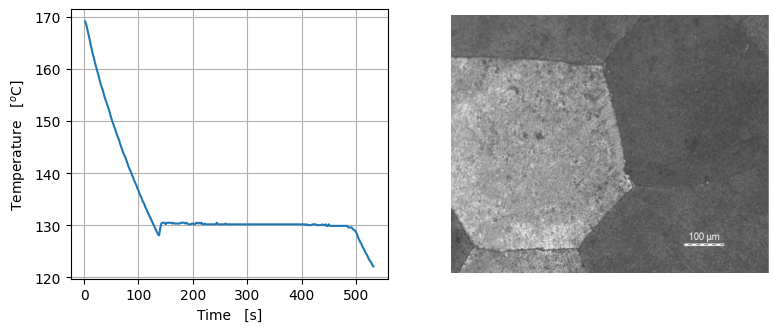

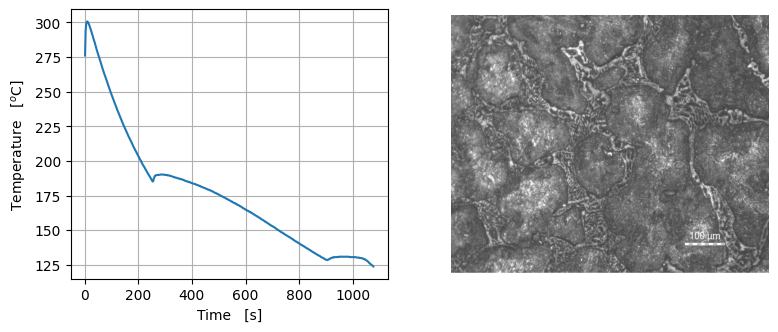

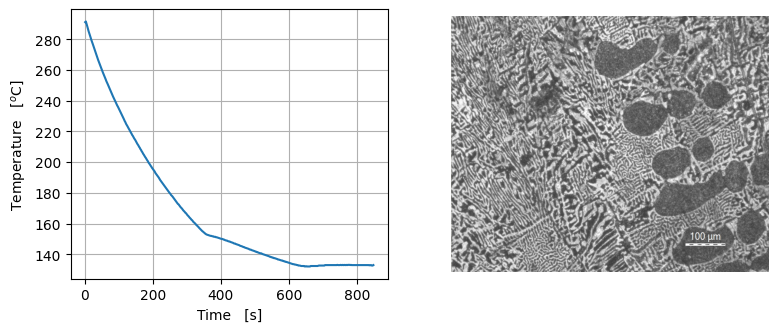

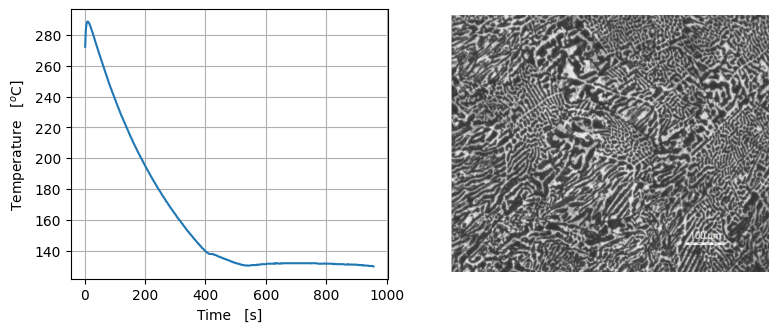

In [7]:
keys = ['Bi_00','Bi_25','Bi_50','Bi_55']
files = sorted(glob.glob('*.jpg'))
for k,f in zip(keys,files):
    q2plotter(D[k],f)
    plt.savefig('plots/q2{}.png'.format(k[2:]),dpi=600,bbox_inches='tight')
    #plt.show()
files

## Question 3

In [8]:
def str_latex(line):
    a = [str(l)+' & ' for l in line]
    b = ''.join(a)
    return b[:-3]+'\\\\ \n  \n \hline \n'
    
def to_latex():
    print('Wt \% & Liquidus & Solvus & Solidus \\\\ \n \midrule \n \hline \n')
    for line in inflections:  
        print(str_latex(line))

to_latex()


Wt \% & Liquidus & Solvus & Solidus \\ 
 \midrule 
 \hline 

0.0 & 130.0 & 0.0 & 0.0\\ 
  
 \hline 

15.0 & 228.0 & 136.0 & 121.0\\ 
  
 \hline 

25.0 & 190.0 & 130.0 & 0.0\\ 
  
 \hline 

40.0 & 165.0 & 133.0 & 0.0\\ 
  
 \hline 

50.0 & 152.0 & 133.0 & 0.0\\ 
  
 \hline 

55.0 & 138.0 & 131.0 & 0.0\\ 
  
 \hline 

65.0 & 143.0 & 134.0 & 0.0\\ 
  
 \hline 

90.0 & 232.0 & 136.0 & 0.0\\ 
  
 \hline 



## Question 4

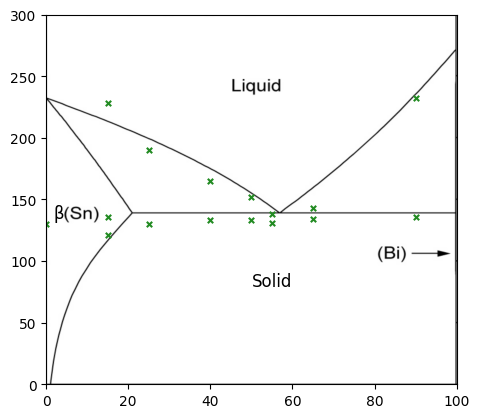

In [9]:
im = plt.imread('bisn_phasediagram.png')
fig,ax = plt.subplots()
#liquidus
ts = [inf for inf in inflections[:,1]]
wt = [inf for inf in inflections[:,0]]

# solidus
ts = []
wt = []
for i in range(len(inflections)):
    inf = inflections[i]
    for i in range(1,4):
        if inf[i] != 0:
            ts.append(inf[i])
            wt.append(inf[0])



ax.scatter(wt,ts,s=15,marker='x',color = 'forestgreen')
ax.imshow(im,extent=[0,100,0,300],aspect=.3)
ax.text(1.9,135,'β',fontsize=12)
ax.text(50,80,'Solid',fontsize=12)
plt.savefig('plots/q4_phase.png',dpi=600)

In [10]:
print('--')

--
